# Detect images to get bounding box

### Detect on test images

In [ ]:
!python ../training_yolov5/detect.py --weights ../training_yolov5/runs/exp0_yolov5s_pre/weights/best_yolov5s_pre.pt  --source ../data/test/images  --save-txt

Namespace(weights=['../training_yolov5/runs/exp0_yolov5s_pre/weights/best_yolov5s_pre.pt'], source='../data/test/images', output='inference/output', img_size=640, conf_thres=0.75, iou_thres=0.5, device='', view_img=False, save_txt=True, classes=None, agnostic_nms=False, augment=False, update=False)
Using CUDA device0 _CudaDeviceProperties(name='NVIDIA GeForce RTX 3050 Laptop GPU', total_memory=4095MB)

Fusing layers... Model Summary: 140 layers, 7.25191e+06 parameters, 6.61683e+06 gradients
image 1/53 ..\data\test\images\969315_dataset 2024-08-07 21-16-14_011608_36_20190903_resized_hflipped.jpg: 640x576 1 crowns, 1 screws, Done. (0.148s)
image 2/53 ..\data\test\images\969315_dataset 2024-08-07 21-16-14_053305_34_20190807_resized.jpg: 640x576 2 crowns, 2 screws, Done. (0.021s)
image 3/53 ..\data\test\images\969315_dataset 2024-08-07 21-16-14_053305_34_20190807_resized_hflipped.jpg: 640x576 2 crowns, 2 screws, Done. (0.011s)
image 4/53 ..\data\test\images\969315_dataset 2024-08-07 21-16-

d:\Master's stuff\Master project\Yolov5s\Data_yolov5\training_yolov5\models\experimental.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.append(torch.load(w, map

Save bounding box info on the bounding_boxes/test folder

In [10]:
import os
import cv2

# Paths
output_folder = "inference/test_output"  # Folder where YOLOv5 saves detection .txt files
test_images_folder = "inference/test_output"
output_bboxes_folder = "bounding_boxes/test"  # Folder to save the bounding box files

# Create the output directory if it doesn't exist
os.makedirs(output_bboxes_folder, exist_ok=True)

# Loop through each text file in the output folder
for txt_file in os.listdir(output_folder):
    if txt_file.endswith(".txt"):
        # Corresponding image file
        img_name = txt_file.replace(".txt", ".jpg")
        img_path = os.path.join(test_images_folder, img_name)
        img = cv2.imread(img_path)
        
        # If the image doesn't exist, skip
        if img is None:
            continue

        h, w, _ = img.shape  # Get the original image dimensions

        # Create a new file to save the bounding box information
        output_bbox_file_path = os.path.join(output_bboxes_folder, txt_file)
        
        with open(os.path.join(output_folder, txt_file), "r") as f, open(output_bbox_file_path, "w") as bbox_file:
            for line in f:
                class_id, x_center, y_center, width, height = map(float, line.strip().split())
                
                # Convert normalized coordinates to pixel values
                x_center *= w
                y_center *= h
                box_width = width * w
                box_height = height * h

                # Calculate top-left and bottom-right corners
                x1 = int(x_center - box_width / 2)
                y1 = int(y_center - box_height / 2)
                x2 = int(x_center + box_width / 2)
                y2 = int(y_center + box_height / 2)

                # Write to the new bounding box file
                bbox_file.write(f"Class (0:crown, 1:screw): {int(class_id)}, Bounding Box (x1,y1), (x2,y2): ({x1}, {y1}), ({x2}, {y2})\n")

        print(f"Saved bounding box information for {img_name} to {output_bbox_file_path}")


Saved bounding box information for 969315_dataset 2024-08-07 21-16-14_011608_36_20190903_resized_hflipped.jpg to bounding_boxes/test\969315_dataset 2024-08-07 21-16-14_011608_36_20190903_resized_hflipped.txt
Saved bounding box information for 969315_dataset 2024-08-07 21-16-14_053305_34_20190807_resized.jpg to bounding_boxes/test\969315_dataset 2024-08-07 21-16-14_053305_34_20190807_resized.txt
Saved bounding box information for 969315_dataset 2024-08-07 21-16-14_053305_34_20190807_resized_hflipped.jpg to bounding_boxes/test\969315_dataset 2024-08-07 21-16-14_053305_34_20190807_resized_hflipped.txt
Saved bounding box information for 969315_dataset 2024-08-07 21-16-14_090760_46_20210831_resized_vflipped.jpg to bounding_boxes/test\969315_dataset 2024-08-07 21-16-14_090760_46_20210831_resized_vflipped.txt
Saved bounding box information for 969315_dataset 2024-08-07 21-16-14_094522_36_20221104_resized.jpg to bounding_boxes/test\969315_dataset 2024-08-07 21-16-14_094522_36_20221104_resized.

All images size are 340 * 410 (Width*Height)

In [13]:
import os
import cv2

# Folder containing the images
image_folder = "inference/test_output"

# Loop through each file in the folder
for file_name in os.listdir(image_folder):
    # Check if the file is an image (e.g., jpg, png, jpeg)
    if file_name.lower().endswith(('.jpg')):
        # Full path to the image
        image_path = os.path.join(image_folder, file_name)
        
        # Read the image
        image = cv2.imread(image_path)
        
        # Check if the image was loaded successfully
        if image is not None:
            # Get image dimensions
            height, width, channels = image.shape
            print(f"Image: {file_name}, Width: {width}, Height: {height}, Channels: {channels}")
        else:
            print(f"Failed to load image: {file_name}")



Image: 969315_dataset 2024-08-07 21-16-14_011608_36_20190903_resized_hflipped.jpg, Width: 340, Height: 410, Channels: 3
Image: 969315_dataset 2024-08-07 21-16-14_053305_34_20190807_resized.jpg, Width: 340, Height: 410, Channels: 3
Image: 969315_dataset 2024-08-07 21-16-14_053305_34_20190807_resized_hflipped.jpg, Width: 340, Height: 410, Channels: 3
Image: 969315_dataset 2024-08-07 21-16-14_090760_46_20210831_resized_vflipped.jpg, Width: 340, Height: 410, Channels: 3
Image: 969315_dataset 2024-08-07 21-16-14_094522_36_20221104_resized.jpg, Width: 340, Height: 410, Channels: 3
Image: 969315_dataset 2024-08-07 21-16-14_106826_26_20240529_resized_hflipped.jpg, Width: 340, Height: 410, Channels: 3
Image: 969315_dataset 2024-08-07 21-16-14_119008_46_20240430_resized_vflipped.jpg, Width: 340, Height: 410, Channels: 3
Image: 969315_dataset 2024-08-07 21-16-14_124324_36_20210810_resized.jpg, Width: 340, Height: 410, Channels: 3
Image: 969315_dataset 2024-08-07 21-16-14_124324_36_20210810_resize

Visualise some test images

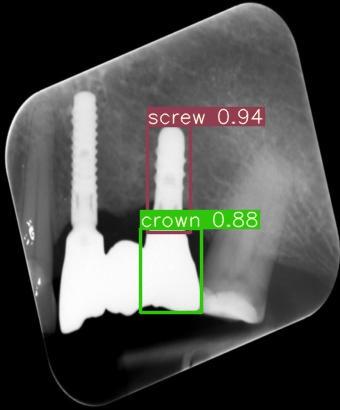

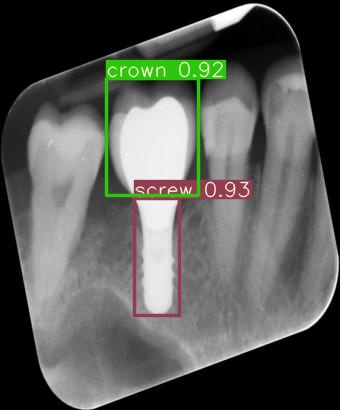

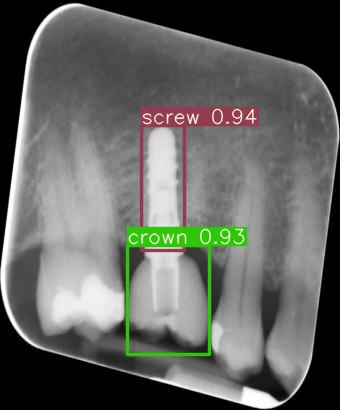

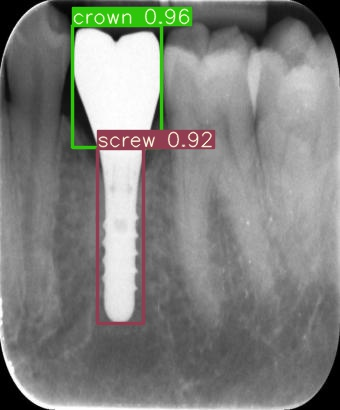

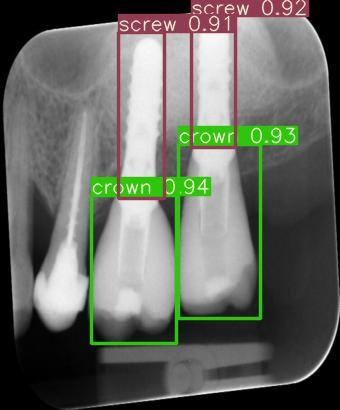

In [14]:
#display inference on ALL test images
import glob
from random import sample
from IPython.display import Image, display
test_list=sample(glob.glob('inference/test_output/*.jpg'),5)
for imageName in test_list: #assuming JPG
    display(Image(filename=imageName))
    print("\n")

### Detect on train images

In [15]:
!python ../training_yolov5/detect.py --weights ../training_yolov5/runs/exp0_yolov5s_pre/weights/best_yolov5s_pre.pt  --source ../data/train/images  --save-txt

Namespace(weights=['../training_yolov5/runs/exp0_yolov5s_pre/weights/best_yolov5s_pre.pt'], source='../data/train/images', output='inference/output', img_size=640, conf_thres=0.75, iou_thres=0.5, device='', view_img=False, save_txt=True, classes=None, agnostic_nms=False, augment=False, update=False)
Using CUDA device0 _CudaDeviceProperties(name='NVIDIA GeForce RTX 3050 Laptop GPU', total_memory=4095MB)

Fusing layers... Model Summary: 140 layers, 7.25191e+06 parameters, 6.61683e+06 gradients
image 1/212 ..\data\train\images\969315_dataset 2024-08-07 21-16-14_011608_36_20190903_resized.jpg: 640x576 1 crowns, 1 screws, Done. (0.143s)
image 2/212 ..\data\train\images\969315_dataset 2024-08-07 21-16-14_011608_36_20190903_resized_vflipped.jpg: 640x576 1 crowns, 1 screws, Done. (0.011s)
image 3/212 ..\data\train\images\969315_dataset 2024-08-07 21-16-14_028172_36_20221206_resized.jpg: 640x576 1 crowns, 1 screws, Done. (0.010s)
image 4/212 ..\data\train\images\969315_dataset 2024-08-07 21-16-

d:\Master's stuff\Master project\Yolov5s\Data_yolov5\training_yolov5\models\experimental.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.append(torch.load(w, map

Save bounding box info on the bounding_boxes/train folder

In [16]:
import os
import cv2

# Paths
output_folder = "inference/train_output"  # Folder where YOLOv5 saves detection .txt files
test_images_folder = "inference/train_output"
output_bboxes_folder = "bounding_boxes/train"  # Folder to save the bounding box files

# Create the output directory if it doesn't exist
os.makedirs(output_bboxes_folder, exist_ok=True)

# Loop through each text file in the output folder
for txt_file in os.listdir(output_folder):
    if txt_file.endswith(".txt"):
        # Corresponding image file
        img_name = txt_file.replace(".txt", ".jpg")
        img_path = os.path.join(test_images_folder, img_name)
        img = cv2.imread(img_path)
        
        # If the image doesn't exist, skip
        if img is None:
            continue

        h, w, _ = img.shape  # Get the original image dimensions

        # Create a new file to save the bounding box information
        output_bbox_file_path = os.path.join(output_bboxes_folder, txt_file)
        
        with open(os.path.join(output_folder, txt_file), "r") as f, open(output_bbox_file_path, "w") as bbox_file:
            for line in f:
                class_id, x_center, y_center, width, height = map(float, line.strip().split())
                
                # Convert normalized coordinates to pixel values
                x_center *= w
                y_center *= h
                box_width = width * w
                box_height = height * h

                # Calculate top-left and bottom-right corners
                x1 = int(x_center - box_width / 2)
                y1 = int(y_center - box_height / 2)
                x2 = int(x_center + box_width / 2)
                y2 = int(y_center + box_height / 2)

                # Write to the new bounding box file
                bbox_file.write(f"Class (0:crown, 1:screw): {int(class_id)}, Bounding Box (x1,y1), (x2,y2): ({x1}, {y1}), ({x2}, {y2})\n")

        print(f"Saved bounding box information for {img_name} to {output_bbox_file_path}")


Saved bounding box information for 969315_dataset 2024-08-07 21-16-14_011608_36_20190903_resized.jpg to bounding_boxes/train\969315_dataset 2024-08-07 21-16-14_011608_36_20190903_resized.txt
Saved bounding box information for 969315_dataset 2024-08-07 21-16-14_011608_36_20190903_resized_vflipped.jpg to bounding_boxes/train\969315_dataset 2024-08-07 21-16-14_011608_36_20190903_resized_vflipped.txt
Saved bounding box information for 969315_dataset 2024-08-07 21-16-14_028172_36_20221206_resized.jpg to bounding_boxes/train\969315_dataset 2024-08-07 21-16-14_028172_36_20221206_resized.txt
Saved bounding box information for 969315_dataset 2024-08-07 21-16-14_028172_36_20221206_resized_hflipped.jpg to bounding_boxes/train\969315_dataset 2024-08-07 21-16-14_028172_36_20221206_resized_hflipped.txt
Saved bounding box information for 969315_dataset 2024-08-07 21-16-14_028172_36_20221206_resized_vflipped.jpg to bounding_boxes/train\969315_dataset 2024-08-07 21-16-14_028172_36_20221206_resized_vfli

Visualise some train images

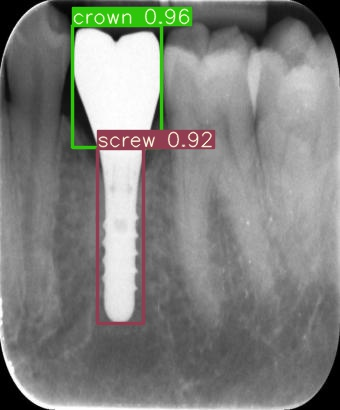

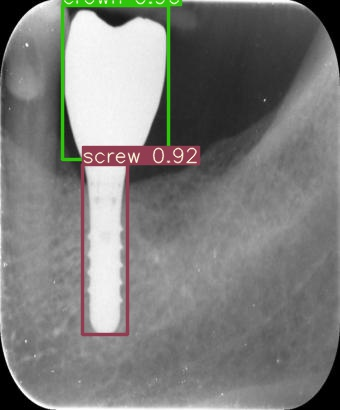

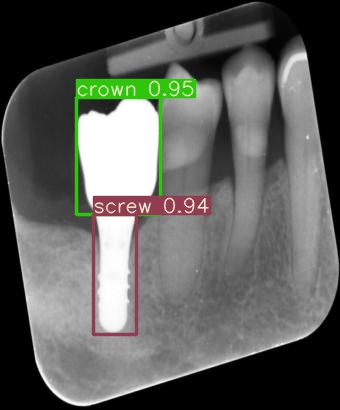

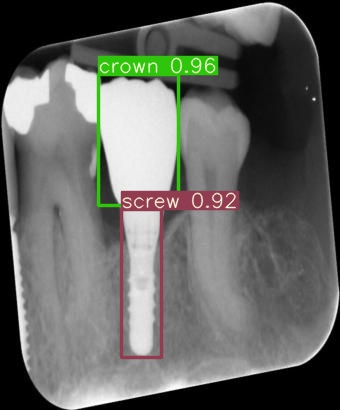

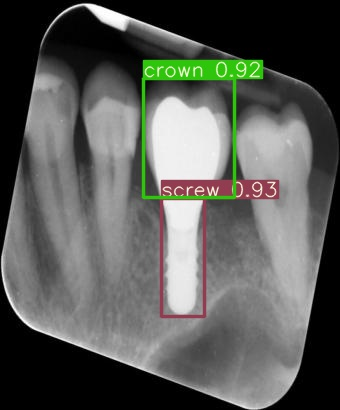

In [17]:
#display inference on ALL test images
import glob
from random import sample
from IPython.display import Image, display
test_list=sample(glob.glob('inference/test_output/*.jpg'),5)
for imageName in test_list: #assuming JPG
    display(Image(filename=imageName))
    print("\n")

Copy images to the bounding_boxes folder

In [18]:
import os
import shutil

# Source and destination folders
source_folder = "inference/test_output"
destination_folder = "bounding_boxes/test"

# Ensure the destination folder exists
os.makedirs(destination_folder, exist_ok=True)

# Loop through each file in the source folder
for file_name in os.listdir(source_folder):
    # Check if the file is a .jpg image
    if file_name.lower().endswith(".jpg"):
        # Full path to the source file
        source_path = os.path.join(source_folder, file_name)
        
        # Full path to the destination
        destination_path = os.path.join(destination_folder, file_name)
        
        # Copy the file
        shutil.copy(source_path, destination_path)
        print(f"Copied {file_name} to {destination_folder}")


Copied 969315_dataset 2024-08-07 21-16-14_011608_36_20190903_resized_hflipped.jpg to bounding_boxes/test
Copied 969315_dataset 2024-08-07 21-16-14_053305_34_20190807_resized.jpg to bounding_boxes/test
Copied 969315_dataset 2024-08-07 21-16-14_053305_34_20190807_resized_hflipped.jpg to bounding_boxes/test
Copied 969315_dataset 2024-08-07 21-16-14_090760_46_20210831_resized_vflipped.jpg to bounding_boxes/test
Copied 969315_dataset 2024-08-07 21-16-14_094522_36_20221104_resized.jpg to bounding_boxes/test
Copied 969315_dataset 2024-08-07 21-16-14_106826_26_20240529_resized_hflipped.jpg to bounding_boxes/test
Copied 969315_dataset 2024-08-07 21-16-14_119008_46_20240430_resized_vflipped.jpg to bounding_boxes/test
Copied 969315_dataset 2024-08-07 21-16-14_124324_36_20210810_resized.jpg to bounding_boxes/test
Copied 969315_dataset 2024-08-07 21-16-14_124324_36_20210810_resized_vflipped.jpg to bounding_boxes/test
Copied 969315_dataset 2024-08-07 21-16-14_173574_25_20220221_resized.jpg to boundi

In [19]:
import os
import shutil

# Source and destination folders
source_folder = "inference/train_output"
destination_folder = "bounding_boxes/train"

# Ensure the destination folder exists
os.makedirs(destination_folder, exist_ok=True)

# Loop through each file in the source folder
for file_name in os.listdir(source_folder):
    # Check if the file is a .jpg image
    if file_name.lower().endswith(".jpg"):
        # Full path to the source file
        source_path = os.path.join(source_folder, file_name)
        
        # Full path to the destination
        destination_path = os.path.join(destination_folder, file_name)
        
        # Copy the file
        shutil.copy(source_path, destination_path)
        print(f"Copied {file_name} to {destination_folder}")


Copied 969315_dataset 2024-08-07 21-16-14_011608_36_20190903_resized.jpg to bounding_boxes/train
Copied 969315_dataset 2024-08-07 21-16-14_011608_36_20190903_resized_vflipped.jpg to bounding_boxes/train
Copied 969315_dataset 2024-08-07 21-16-14_028172_36_20221206_resized.jpg to bounding_boxes/train
Copied 969315_dataset 2024-08-07 21-16-14_028172_36_20221206_resized_hflipped.jpg to bounding_boxes/train
Copied 969315_dataset 2024-08-07 21-16-14_028172_36_20221206_resized_vflipped.jpg to bounding_boxes/train
Copied 969315_dataset 2024-08-07 21-16-14_053305_34_20190807_resized_vflipped.jpg to bounding_boxes/train
Copied 969315_dataset 2024-08-07 21-16-14_090760_46_20210831_resized.jpg to bounding_boxes/train
Copied 969315_dataset 2024-08-07 21-16-14_090760_46_20210831_resized_hflipped.jpg to bounding_boxes/train
Copied 969315_dataset 2024-08-07 21-16-14_094522_36_20221104_resized_hflipped.jpg to bounding_boxes/train
Copied 969315_dataset 2024-08-07 21-16-14_094522_36_20221104_resized_vfli